In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

print('Number of training observations:', len(train_data))
train_data.head()

Number of training observations: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Number of testing observations:', len(test_data))
test_data.head()

Number of testing observations: 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# replace 'male' values to 0 and 'female' values to 1
train_data = train_data.replace({'male': 0, 'female': 1})
test_data = test_data.replace({'male': 0, 'female': 1})

In [5]:
# get one-hot encoding for 'Embarked' column
train_embarked = pd.get_dummies(train_data['Embarked'])
for c in train_embarked.columns:
    train_data[c] = train_embarked[c]
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [6]:
train_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


# EDA (Exploratory Data Analysis)

## Check for empty/NaN Values

In [7]:
# check for empty values on training set
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 2
Number of empty values on "C" column: 0
Number of empty values on "Q" column: 0
Number of empty values on "S" column: 0


In [8]:
# check for empty values on test set
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 1
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


## Survival Rate

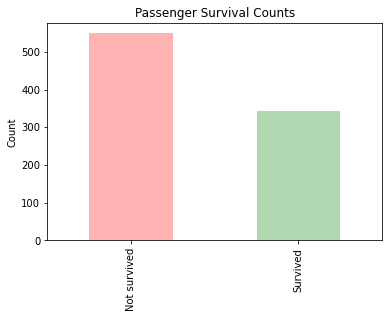

In [9]:
# visualize the number of survived passengers
LABEL = ['Not survived', 'Survived']
df_survived = train_data[['Survived']].value_counts()
df_survived.plot(kind='bar', color=['red', 'green'], alpha=.3)

plt.title('Passenger Survival Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), LABEL)
plt.show()

## Gender

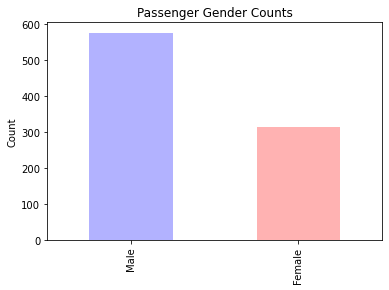

In [10]:
# visualize the count of passenger genders
GENDER = ['Male', 'Female']
df_sex = train_data[['Sex']].value_counts()
df_sex.plot(kind='bar', color=['blue', 'red'], alpha=.3)

plt.title('Passenger Gender Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), GENDER)

plt.show()

In [11]:
# group the passengers who survived by gender
df_survived_gender = train_data[['Survived', 'Sex']].value_counts()
df_survived_gender = pd.pivot_table(df_survived_gender.to_frame(), values=0, index=['Survived', 'Sex'], aggfunc=np.sum)
df_survived_gender = df_survived_gender.reset_index()
df_survived_gender = df_survived_gender.rename(columns={0: 'Counts'})

df_survived_gender

,Survived,Sex,Counts
0,0,0,468
1,0,1,81
2,1,0,109
3,1,1,233


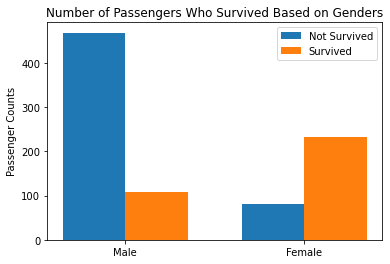

In [12]:
# number of passengers who didn't survive grouped by gender
x = np.arange(len(GENDER))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, df_survived_gender[df_survived_gender['Survived'] == 0]['Counts'], width)
ax.bar(x + width/2, df_survived_gender[df_survived_gender['Survived'] == 1]['Counts'], width)
# plt.xticks(np.arange(2), GENDER)
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Genders')
ax.set_xticks(x)
ax.set_xticklabels(GENDER)
ax.legend(['Not Survived', 'Survived'])

plt.show()

## Ticket Class (PClass)

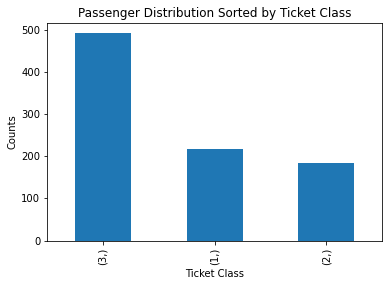

In [13]:
# visualize the count of ticket class
df_pclass = train_data[['Pclass']].value_counts()
df_pclass.plot(kind='bar')

plt.title('Passenger Distribution Sorted by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Counts')

plt.show()

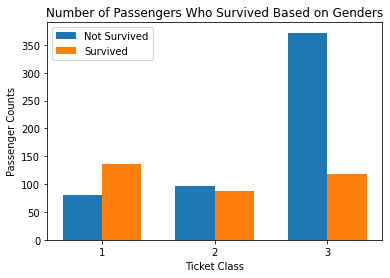

In [14]:
# visualize passengers who survived based on ticket class
TICKET = ['1', '2', '3']
df_survived_pclass = train_data[['Pclass', 'Survived']].value_counts()
df_survived_pclass  = pd.pivot_table(df_survived_pclass.to_frame(), values=0, index=['Survived', 'Pclass'], aggfunc=np.sum)
df_survived_pclass  = df_survived_pclass.reset_index()
df_survived_pclass  = df_survived_pclass.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(TICKET))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Ticket Class')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Genders')
ax.set_xticks(x)
ax.set_xticklabels(TICKET)
ax.legend()

plt.show()
# df_survived_pclass.plot(kind='bar')
# plt.title('Number of Passengers Who Survived Based on Ticket Class')
# plt.ylabel('Passengers Survived')
# plt.xlabel('Ticket Class')

# plt.show()

## Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

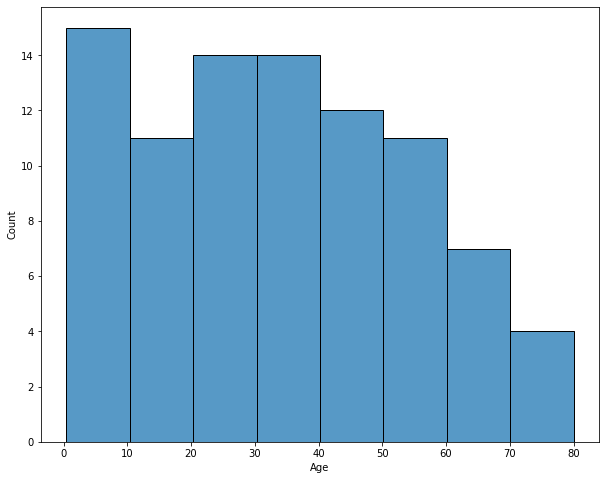

In [45]:
# visualize age distribution
df_age = train_data[['Age']].value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data=df_age, x='Age')

# plt.title('Passenger Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Counts')

# plt.show()

In [40]:
# passengers who survived based on their ages
df_survived_age = train_data[['Age', 'Survived']]
df_survived_age = df_survived_age.groupby(['Age']).sum()

df_survived_age
# plt.figure(figsize=(10,8))
# sns.histplot(data=df_survived_age, x='Age')
# plt.title('Number of Passengers Survived Grouped by Age')
# plt.xlabel('Age Groups')
# plt.ylabel('Passengers Survived')


,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,0
70.50,0
71.00,0


## Embarked

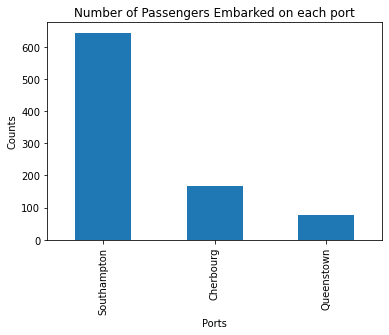

In [18]:
# visualize the number of passengers based on port of embarktion
PORTS = ['Southampton', 'Cherbourg', 'Queenstown']
df_port = train_data[['Embarked']].value_counts()
df_port.plot(kind='bar')

plt.title('Number of Passengers Embarked on each port')
plt.xlabel('Ports')
plt.ylabel('Counts')
plt.xticks(np.arange(3), PORTS)

plt.show()

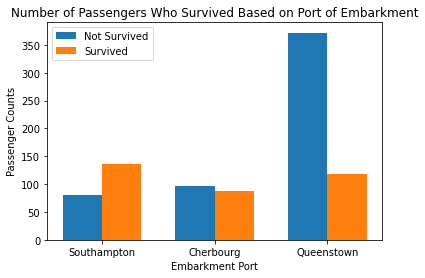

In [47]:
df_survived_port = train_data[['Embarked', 'Survived']].value_counts()
df_survived_port  = pd.pivot_table(df_survived_port.to_frame(), values=0, index=['Survived', 'Embarked'], aggfunc=np.sum)
df_survived_port  = df_survived_port.reset_index()
df_survived_port  = df_survived_port.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(PORTS))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Embarkment Port')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Port of Embarkment')
ax.set_xticks(x)
ax.set_xticklabels(PORTS)
ax.legend()

plt.show()

## Number of Siblings/Spouses (SibSp)

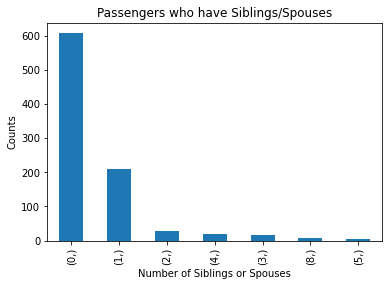

In [20]:
# visualize the number of passengers who have siblings or spouses
df_sibsp = train_data[['SibSp']].value_counts()
df_sibsp.plot(kind='bar')

plt.title('Passengers who have Siblings/Spouses')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Counts')

plt.show()

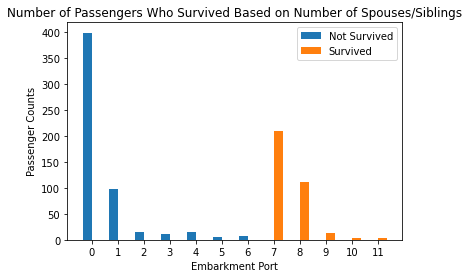

In [152]:
NUM_OF_SIBSP = train_data.SibSp.unique()

df_survived_sibsp = train_data[['SibSp', 'Survived']].value_counts()
df_survived_sibsp = pd.pivot_table(df_survived_sibsp.to_frame(), values=0, index=['Survived', 'SibSp'], aggfunc=np.sum)
df_survived_sibsp = df_survived_sibsp.reset_index()
df_survived_sibsp = df_survived_sibsp.rename(columns={0: 'Counts'})

df_temp_sibsp = df_survived_sibsp[df_survived_sibsp['Survived'] == 0]['Counts'].to_frame()
df_temp_sibsp2 = df_survived_sibsp[df_survived_sibsp['Survived'] == 1]['Counts'].to_frame()

for i in range(len(df_temp_sibsp)):
    df_temp_sibsp2.loc[i] = 0
    
df_temp_sibsp2 = df_temp_sibsp2.sort_index()

for i in range(7, len(df_temp_sibsp2)):
    df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(NUM_OF_SIBSP)+5)

ax.bar(x - width/2, df_temp_sibsp['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_sibsp2['Counts'], width, label='Survived')

ax.set_xlabel('Embarkment Port')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Spouses/Siblings')
ax.set_xticks(x)
# ax.set_xticklabels(NUM_OF_SIBSP)
ax.legend()

plt.show()

## Number of Parents/Children (Parch)

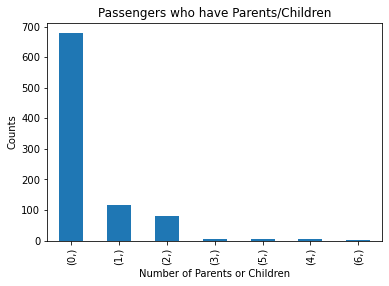

In [21]:
# visualize the number of passengers who have parents or children
df_parch = train_data[['Parch']].value_counts()
df_parch.plot(kind='bar')

plt.title('Passengers who have Parents/Children')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Counts')

plt.show()

## Fare

Text(0, 0.5, 'Counts')

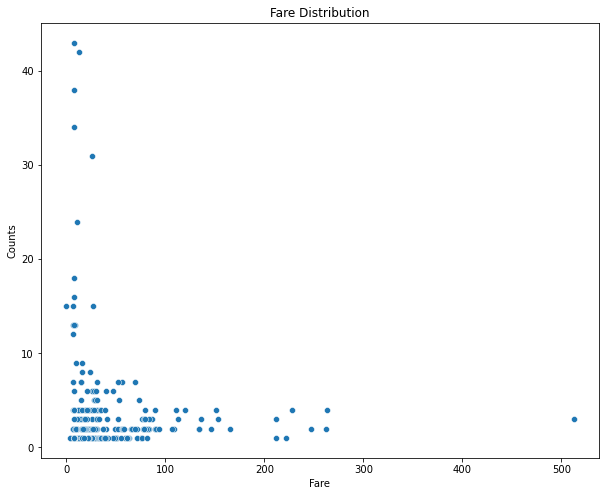

In [22]:
# visualize fare distribution
df_fare = train_data[['Fare']].value_counts()
df_fare = df_fare.reset_index()

plt.figure(figsize=(10,8))
plt.title('Fare Distribution')
sns.scatterplot(x=df_fare['Fare'], y=df_fare[0], data=df_fare)
plt.ylabel('Counts')

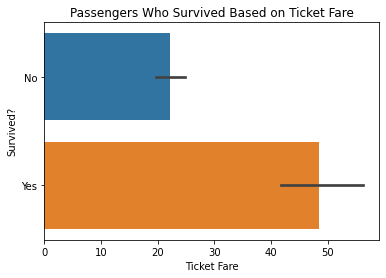

In [23]:
# visualize relattionship between fare against survival
SURVIVED = ['No', 'Yes']

df_survived_fare = train_data[['Fare', 'Survived']]
sns.barplot(x=df_survived_fare['Fare'], y=df_survived_fare['Survived'], data=df_survived_fare, orient='h')

plt.title('Passengers Who Survived Based on Ticket Fare')
plt.yticks(np.arange(2), SURVIVED)
plt.ylabel('Survived?')
plt.xlabel('Ticket Fare')

plt.show()

## Pearson Correlation

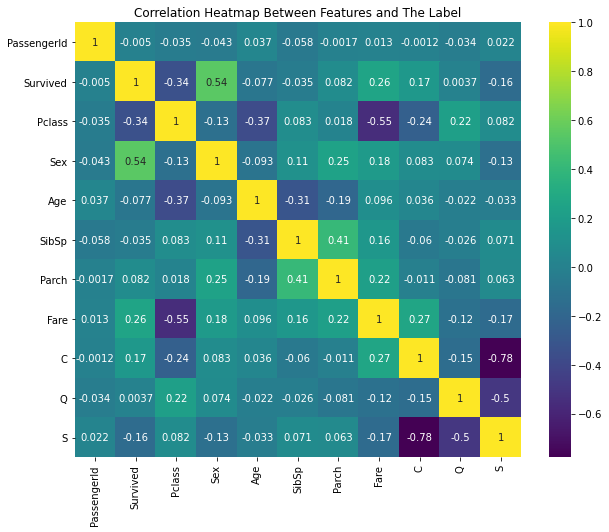

In [24]:
# pearson correlation against features and label
train_corr = train_data.corr()
plt.figure(figsize=(10,8))

sns.heatmap(train_corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap Between Features and The Label')

plt.show()

In [25]:
# # build a prediction model
# from sklearn.ensemble import RandomForestClassifier

# y_train = train_data['Survived']
# x_train = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']]
# x_test = test_data[['Pclass', 'Sex', 'SibSp', 'Parch']]

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(x_train, y_train)
# preds = model.predict(x_test)

In [26]:
# output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': preds})
# output.to_csv('titanic_rf_submission.csv', index=False)
# print("Submission saved!")